# アイスクリーム統計学 with Python 第10章

第１２回講義（2017年11月3日講義、11月7日課題提出締切）

このページは、<a href="http://kogolab.chillout.jp/elearn/icecream/index.html" target="_blank">アイスクリーム統計学にようこそ！</a>を終えた学生向けに、復習と補足のために私が追記したものです。

<h1 STYLE="background: #c2edff;padding: 0.5em;">第１０章 主成分分析</h1>

<a href="IceCreamStatistics08.ipynb">第８章</a>・<a href="IceCreamStatistics09.ipynb">第９章</a> では因子分析の概要を勉強しました。似て非なる手法として「主成分分析」があります。

<h2 STYLE="background: #c2edff;padding: 0.5em;">10.1 因子分析と主成分分析の違い</h2>

（図は http://www.f.waseda.jp/oshio.at/edu/data_b/top.html から）

<h4 style="border-bottom: solid 1px black;">因子分析の目的は「共通因子を見つけること」</h4>

<b>X</b><sub>j</sub> = <b>a</b><sub>j1</sub><b>f</b><sub>1</sub> + <b>a</b><sub>j2</sub><b>f</b><sub>2</sub> + <b>e</b><sub>j</sub>
* <b>X</b> : 測定された変数（観測変数）
* <b>a</b> : 因子負荷
* <b>f</b> : 潜在因子（共通因子）
* <b>e</b> : 独自因子
<img src="image/ad_01.jpg">
* 因子は変数を説明する独立変数
* 共通因子の影響を除いたら変数間の偏相関が0になるように因子負荷を求める
* 誤差は独自因子に含まれ、共通因子に誤差は含まれない
* 変数間の相関関係を因子によって説明する
* 因子の数を少なくすることが目的ではない。

<h4 style="border-bottom: solid 1px black;">主成分分析の目的は「情報を縮約すること」</h4>

<b>Z</b><sub>j</sub> = <b>a</b><sub>j1</sub><b>X</b><sub>1</sub> + <b>a</b><sub>j2</sub><b>X</b><sub>2</sub>
* <b>Z</b> : 主成分
* <b>a</b> : 主成分負荷量
* <b>X</b> : 測定された変数（観測変数）

<img src="image/ad_02.jpg">
* 主成分分析はデータの記述であり、因子分析のような潜在変数を想定したモデルではない。観測変数が共有する情報を合成変数として集約する
* 主成分は変数によってその値が決まる従属変数
* 主成分の分散が最大になるように変数にかかる重みを求める
* 独自因子を考慮せず、誤差を含む観測変数からそのまま主成分を合成するので、主成分にも誤差は含まれる
* <b>a</b><sub>j1</sub><sup>2</sup> + <b>a</b><sub>j2</sub><sup>2</sup> = 1
* もとの変数群の分散をできるだけ取り込むような合成変数を求める
* 主成分をできる限り少なくすることが目的

<h2 STYLE="background: #c2edff;padding: 0.5em;">10.2 主成分分析</h2>

<h4 style="border-bottom: solid 1px black;">主成分の決め方</h4>

(図は https://www.macromill.com/service/data_analysis/d009.html から)

<img src="image/image_002.gif">

* まず、分散が最大になるように第1主成分を決めます。
* 次に、第1主成分とは相関しないという条件下で分散が最大になるように、第2主成分を決めます。
* 第3主成分以降も同様。

<h4 style="border-bottom: solid 1px black;">主成分分析の解釈</h4>

* 第一主成分は総合指標になることが多い
* 上位の主成分ほど個体の散らばりをよく表す
* 異なる主成分どうしは無相関 (軸が直交)。すなわち、異なる主成分は互いに無関係な意味をもつ。
* 主成分はどちらの方向が正か負かを決められないので、主成分の正負と意味づけにおける正負が逆転してもよい。

<h2 STYLE="background: #c2edff;padding: 0.5em;">10.3 Pythonで主成分分析</h2>

Pythonでは、主成分分析を行うためのライブラリが使えます。

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題10.1</h4>

主成分分析を行う以下のコードを実行してください。

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt'

In [3]:
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'icecream_chosa.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'icecream_chosa.txt') # Python 3 の場合

('icecream_chosa.txt', <http.client.HTTPMessage at 0x107adbbe0>)

In [4]:
import pandas as pd # データフレームワーク処理のライブラリをインポート

In [5]:
df = pd.read_csv('icecream_chosa.txt', sep='\s+', index_col=0) # スペース区切りで読み込み

In [6]:
df.head() #最初の数レコードだけ確認

,gender,age,birth_order,frequency,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,
1,2,20,2,5,7,7,8,3,9,9,...,7,9,3,3,9,7,8,8,1,7
2,2,21,2,1,7,8,9,9,9,9,...,4,7,8,9,9,4,7,7,8,9
3,2,21,3,2,7,4,3,3,6,4,...,4,6,3,3,6,7,3,7,3,3
4,2,21,4,3,9,6,6,5,8,6,...,4,9,5,4,8,9,1,2,1,3
5,2,21,4,2,9,5,7,5,6,8,...,6,6,6,5,9,6,6,6,9,1


In [7]:
df2 = df.iloc[:, 4:] # 指定した行、指定した列だけ抜き出す

In [8]:
df2.head() #最初の数レコードだけ確認

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,
1,7,7,8,3,9,9,6,8,3,2,...,7,9,3,3,9,7,8,8,1,7
2,7,8,9,9,9,9,2,7,7,9,...,4,7,8,9,9,4,7,7,8,9
3,7,4,3,3,6,4,7,7,6,3,...,4,6,3,3,6,7,3,7,3,3
4,9,6,6,5,8,6,8,9,6,5,...,4,9,5,4,8,9,1,2,1,3
5,9,5,7,5,6,8,4,4,4,6,...,6,6,6,5,9,6,6,6,9,1


In [9]:
# 行列の正規化を行います。
# 一般的には平均 0 、分散 (及び標準偏差) が 1 になるように値を変換することを指します。
# axis=1 とすれば、列ではなく行単位で正規化します。
df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [10]:
df3.head() #最初の数レコードだけ確認

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.176843,0.285975,0.986901,-1.568505,1.201122,0.976997,0.557702,1.017604,-1.430286,-1.527790,...,0.942899,1.309485,-1.205746,-1.450150,0.811890,0.293979,0.605890,1.201419,-1.621162,0.518582
2,-0.176843,0.888029,1.535179,1.662750,1.201122,0.976997,-1.493615,0.511962,0.904875,1.422425,...,-0.721040,0.316511,1.280328,1.978776,0.811890,-1.385899,0.157082,0.713533,0.914734,1.348313
3,-0.176843,-1.520185,-1.754490,-1.568505,-0.759894,-1.544286,1.070531,0.511962,0.321085,-1.106330,...,-0.721040,-0.179977,-1.205746,-1.450150,-0.975758,0.293979,-1.638146,0.713533,-0.896620,-1.140880
4,1.312364,-0.316078,-0.109656,-0.491420,0.547450,-0.535773,1.583360,1.523246,0.321085,-0.263412,...,-0.721040,1.309485,-0.211316,-0.878662,0.216007,1.413897,-2.535760,-1.725896,-1.621162,-1.140880
5,1.312364,-0.918132,0.438622,-0.491420,-0.759894,0.472741,-0.467957,-1.004963,-0.846496,0.158047,...,0.388252,-0.179977,0.285899,-0.307175,0.811890,-0.265981,-0.291725,0.225647,1.277005,-1.970611


In [11]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [13]:
#主成分分析の実行
pca = PCA()
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# 主成分負荷量：上から順に第一主成分、第二主成分、、、
pd.DataFrame(pca.components_, columns=df3.columns)

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
0,0.057998,-0.155748,-0.256600,-0.293405,-0.226863,-0.234282,-0.061221,-0.227341,-0.260042,-0.065225,...,-0.249216,-0.305818,-0.305744,-0.241705,-0.238734,-0.067219,-0.204791,-0.267895,-0.152805,-0.252980
1,0.218694,0.120400,0.118676,-0.135732,0.279651,0.128995,0.262083,0.144640,-0.103761,-0.239739,...,0.200238,0.118051,-0.160850,-0.074621,0.145509,0.111897,-0.207532,0.010532,-0.493640,0.081609
2,0.250208,-0.060131,0.174907,0.227267,0.096181,-0.352577,-0.292116,-0.048034,-0.058058,0.253542,...,-0.088661,-0.075946,0.089065,0.048152,-0.356426,-0.238035,0.263269,0.265356,-0.267155,0.242998
3,0.204013,0.196458,0.275888,-0.273458,-0.372010,-0.139238,0.161303,0.108687,-0.429975,0.057973,...,0.277134,0.104142,-0.279672,0.134644,-0.121443,0.174482,0.231095,0.210374,0.131094,0.002291
4,-0.313038,0.221180,0.108008,0.170933,-0.197132,-0.192374,0.329743,0.118842,0.125213,-0.082462,...,-0.167118,-0.102920,0.241227,0.291295,-0.358696,0.371493,0.067048,-0.272933,-0.211756,-0.073941
5,0.094490,-0.458008,0.259937,0.041558,0.158064,-0.157715,-0.165444,0.565440,0.061968,0.142481,...,0.024453,0.007352,-0.145819,0.159510,0.065547,0.069714,-0.049707,-0.192830,-0.023013,-0.436087
6,-0.460982,-0.241608,0.117731,-0.043624,-0.019212,-0.230809,0.146293,-0.108974,0.002160,-0.134955,...,0.373712,0.285779,-0.007845,0.090750,-0.250226,-0.425330,-0.341155,0.129259,-0.030567,-0.000142
7,0.104835,0.434850,0.116024,0.042545,0.028956,-0.024352,0.261718,-0.080041,0.144858,0.633232,...,0.113253,-0.075064,-0.048202,-0.053737,0.087383,-0.341706,-0.178303,-0.222896,-0.049595,-0.229909
8,-0.121380,0.023056,-0.016450,0.105408,0.088614,0.252625,0.076394,0.109179,-0.286170,-0.227102,...,0.126028,-0.542330,-0.071002,0.373934,0.086359,-0.446734,0.262514,-0.137293,0.002812,0.015428
9,0.036910,0.189629,0.294942,0.030126,0.062817,-0.035139,-0.477216,-0.459755,-0.180137,-0.097159,...,0.048589,0.058950,0.088985,0.427477,0.176946,0.162703,-0.268699,-0.140860,0.034757,-0.186866


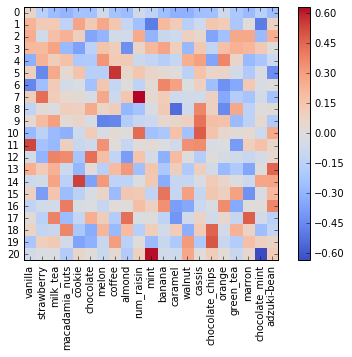

In [15]:
# 主成分負荷量：上から順に第一主成分、第二主成分、、、
# 主成分負荷量の表をカラーマップで表して俯瞰してみる
import numpy as np
fig = plt.figure(figsize=(6, 5))
plt.imshow(pca.components_, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xticks(np.arange(len(df3.columns)), df3.columns, rotation=90)
plt.yticks(np.arange(len(pca.components_)), range(len(pca.components_)))
plt.tight_layout()

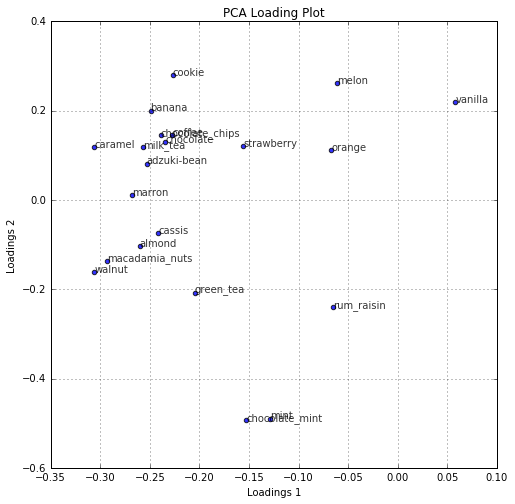

In [16]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(pca.components_.T[:, 0], pca.components_.T[:, 1], df3.columns):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(pca.components_.T[:, 0], pca.components_.T[:, 1], alpha=0.8)
plt.title("PCA Loading Plot")
plt.xlabel("Loadings 1")
plt.ylabel("Loadings 2")
plt.grid(True)
plt.show()

In [17]:
# 主成分得点：データを主成分空間に写像 = 次元圧縮
pd.DataFrame(pca.transform(df3))

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.388741,3.931766,-0.190429,1.204257,-1.193894,-0.248651,0.343060,-1.308806,0.036754,-0.763429,...,-1.881185,0.394570,-0.556384,0.239668,-0.205429,-0.772368,-0.068601,-0.382273,0.383211,0.143368
1,-3.481937,-1.150558,1.630954,-1.248444,-0.474012,0.194318,-0.349021,0.957660,0.946408,1.377468,...,0.056182,0.553897,1.031886,0.361385,-0.880197,-0.096926,0.253473,-0.682125,0.455079,-0.098200
2,3.318962,1.076820,-0.647807,-0.284609,0.201799,0.549237,1.261199,-1.058156,-1.505254,-1.862333,...,0.687820,-0.921301,-0.405659,-0.159021,-0.763008,-0.125175,0.772493,0.468977,0.479812,-0.185258
3,1.266358,2.753307,-1.531696,-0.695361,1.083189,1.937382,-0.254434,0.745612,-2.217746,-0.466317,...,1.229385,0.312856,0.685818,0.311152,-0.397442,-0.260925,-0.738632,0.019823,-0.144640,0.628962
4,0.626560,-1.532331,-1.196892,1.065618,-1.849010,0.786353,-0.266964,0.350615,-0.101252,1.072560,...,0.944124,0.634915,-0.681837,-0.381928,0.454602,-0.690475,0.675849,0.232572,-0.122685,0.378331
5,-0.579254,-2.418890,-2.146680,1.751089,1.250265,1.308246,-0.152857,0.018562,-0.560497,0.106848,...,-0.617815,-0.227078,-1.010646,-0.775411,-0.667491,-0.768583,-0.714537,0.280080,-0.155599,0.100980
6,1.212320,2.805625,-1.456165,0.031634,-0.403441,0.301207,-0.776940,-0.710202,-0.862250,1.402430,...,0.358169,-0.413436,0.102564,-1.161071,0.036962,-0.443403,0.570701,-0.426656,0.190989,0.211924
7,-1.266518,-1.101758,1.119145,-0.156561,1.919024,0.237912,0.344112,-0.406068,0.862147,-0.320085,...,0.817201,-0.749894,1.107618,-0.165483,-0.415638,0.147172,-0.343569,-0.203631,-0.683821,-0.078151
8,0.330796,-0.350068,-1.340527,-1.628066,0.520817,0.532343,0.345117,0.013658,0.039518,0.789645,...,0.978970,-0.329875,0.422738,-0.895563,-0.930638,-0.066771,-1.215441,-0.036969,0.364383,-0.426964
9,1.050850,1.998598,-1.129773,0.557333,0.703131,2.103673,1.974927,-0.107639,1.882577,1.794028,...,-1.688792,0.785357,-0.545497,-0.322496,0.482994,-0.207302,-0.268107,0.430245,-0.844091,0.065491


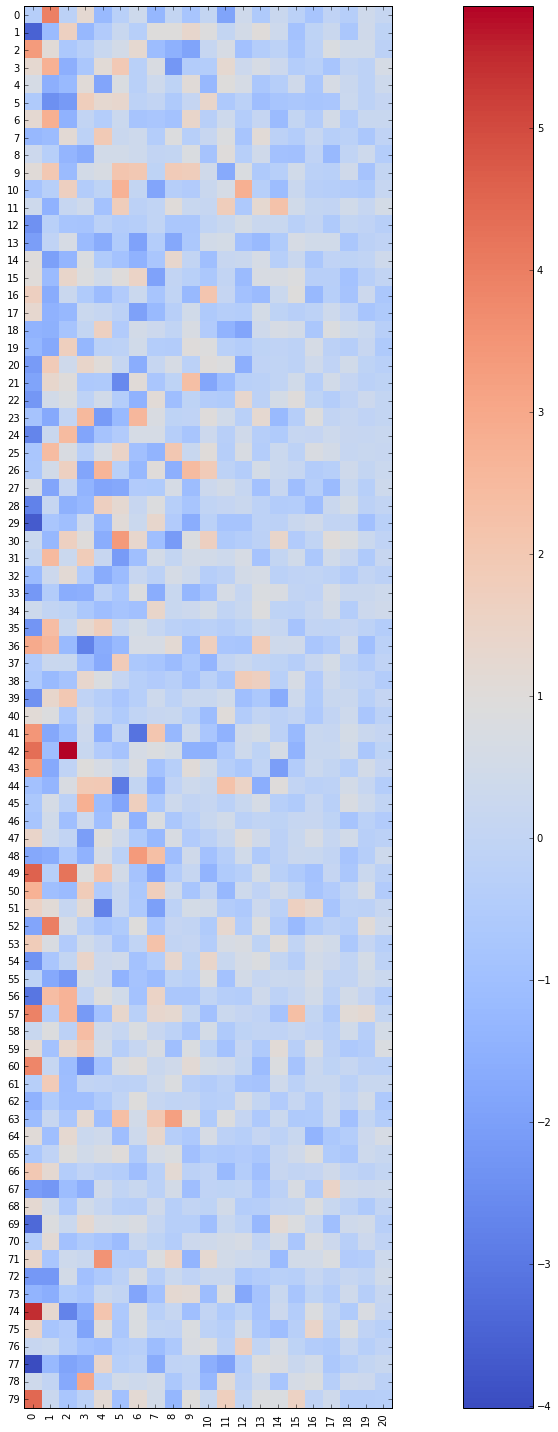

In [18]:
# 主成分得点をカラーマップで表したもの
transformed = pca.transform(df3)
fig = plt.figure(figsize=(20, 20))
plt.imshow(transformed, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xticks(np.arange(len(pca.components_)), range(len(pca.components_)), rotation=90)
plt.yticks(np.arange(len(transformed)), range(len(transformed)))
plt.tight_layout()

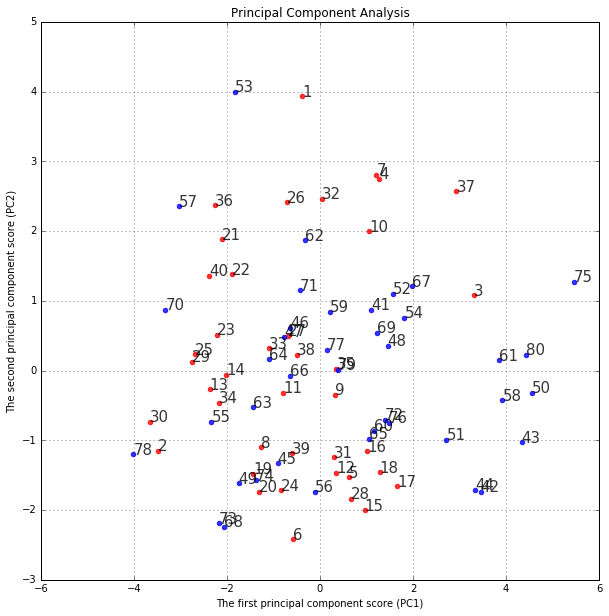

In [19]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(10, 10))
for x, y, name in zip(transformed[:, 0], transformed[:, 1], df3.index):
    plt.text(x, y, name, alpha=0.8, size=15)
plt.scatter(transformed[:40, 0], transformed[:40, 1], alpha=0.8, color='red') # 女性は赤色
plt.scatter(transformed[40:, 0], transformed[40:, 1], alpha=0.8, color='blue') # 男性は青色
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component score (PC1)")
plt.ylabel("The second principal component score (PC2)")
plt.grid()
plt.show()

<h2 STYLE="background: #c2edff;padding: 0.5em;">アイスクリーム統計学 第１０章 課題</h2>

__課題10.1__ を解いて、指定のメールアドレスまでメールしてください。メール送信後は、エラーが帰ってきてないことを確認してください（メールアドレスを間違える人がときどき居ます）。
* 締切：11月7日（今すぐでなくても結構です）
* メールタイトル：「アイスクリーム統計学 第１０章」
* 学籍番号と氏名を明記すること。
* 感想などがあれば書いてくれると嬉しいです。次回以降の講義の改善につながるかも知れません。

In [20]:
# アイスクリーム統計学 第１０章 課題

<h2 STYLE="background: #c2edff;padding: 0.5em;">終わったら、<a href="IceCreamStatistics11.ipynb">第１１章：線形回帰の復習</a> に進んでください。</h2>
（2017年11月3日講義、11月7日課題提出締切）